# Dectecteur Emotion

L'objectif est qu'à partir de données textuelles, je classifie l'émotion du texte

pour ce faire, nous utiliseras go/emotions : https://www.kaggle.com/datasets/shivamb/go-emotions-google-emotions-dataset?resource=download

In [1]:
import pandas as pd

# Charger le dataset
df = pd.read_csv('../data/emotion_datasets/go_emotions_dataset.csv')

# Aperçu
print("Shape:", df.shape)
df.head()


Shape: (211225, 31)


,id,text,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,eew5j0j,That game hurt.,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,eemcysk,>sexuality shouldn’t be a grouping category I...,True,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ed2mah1,"You do right, if you don't care then fuck 'em!",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,eeibobj,Man I love reddit.,False,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,eda6yn6,"[NAME] was nowhere near them, he was by the Fa...",False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
print("Colonnes disponibles :")
print(df.columns)

print("\nTypes de données :")
print(df.dtypes)

Colonnes disponibles :
Index(['id', 'text', 'example_very_unclear', 'admiration', 'amusement',
       'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity',
       'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral'],
      dtype='object')

Types de données :
id                      object
text                    object
example_very_unclear      bool
admiration               int64
amusement                int64
anger                    int64
annoyance                int64
approval                 int64
caring                   int64
confusion                int64
curiosity                int64
desire                   int64
disappointment           int64
disapproval              int64
disgust                  int64
embarrassment            int64
excitement               

In [3]:
# Longueur moyenne des textes
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print("Longueur moyenne des textes :", df['text_length'].mean())

# Nombre de valeurs uniques par colonne (si pertinent)
print("\nValeurs uniques par colonne :")
print(df.nunique())


Longueur moyenne des textes : 12.99718783287963

Valeurs uniques par colonne :
id                      58011
text                    57732
example_very_unclear        2
admiration                  2
amusement                   2
anger                       2
annoyance                   2
approval                    2
caring                      2
confusion                   2
curiosity                   2
desire                      2
disappointment              2
disapproval                 2
disgust                     2
embarrassment               2
excitement                  2
fear                        2
gratitude                   2
grief                       2
joy                         2
love                        2
nervousness                 2
optimism                    2
pride                       2
realization                 2
relief                      2
remorse                     2
sadness                     2
surprise                    2
neutral              

### Analyse des étiquettes

Nombre de labels : 30

Distribution des émotions :
text_length             2745331
neutral                   55298
approval                  17620
admiration                17131
annoyance                 13618
gratitude                 11625
disapproval               11424
curiosity                  9692
amusement                  9245
realization                8785
optimism                   8715
disappointment             8469
love                       8191
anger                      8084
joy                        7983
confusion                  7359
sadness                    6758
caring                     5999
excitement                 5629
surprise                   5514
disgust                    5301
desire                     3817
example_very_unclear       3411
fear                       3197
remorse                    2525
embarrassment              2476
nervousness                1810
pride                      1302
relief                     1289
grief                

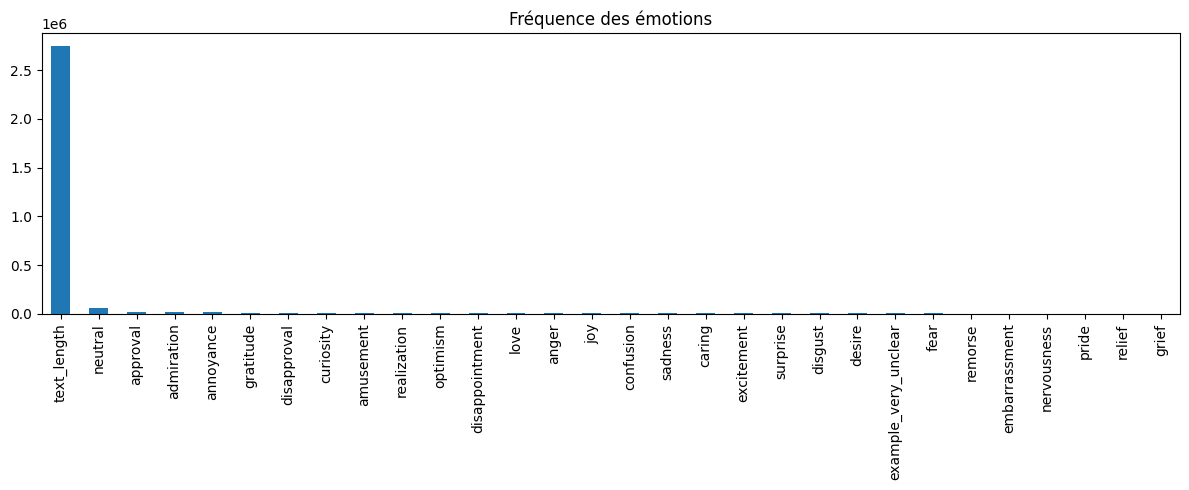

In [4]:
label_cols = [col for col in df.columns if col not in ['text', 'id']]  # ajuste selon les vraies colonnes
print("Nombre de labels :", len(label_cols))

# Fréquence des émotions
emotion_counts = df[label_cols].sum().sort_values(ascending=False)
print("\nDistribution des émotions :")
print(emotion_counts)

# Affichage graphique
import matplotlib.pyplot as plt

emotion_counts.plot(kind='bar', figsize=(12,5), title="Fréquence des émotions")
plt.tight_layout()
plt.show()


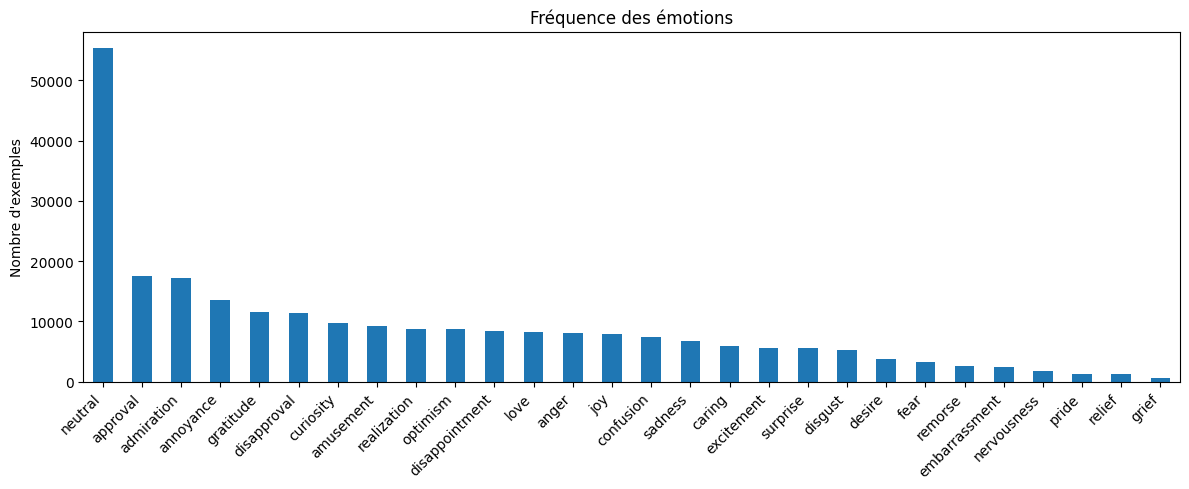

In [6]:
import matplotlib.pyplot as plt

label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'text_length']]
emotion_counts = df[label_cols].sum().sort_values(ascending=False)

emotion_counts.plot(kind='bar', figsize=(12,5), title="Fréquence des émotions")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [7]:
df['num_labels'] = df[label_cols].sum(axis=1)

print("Nombre moyen d'émotions par texte :", df['num_labels'].mean())
df['num_labels'].value_counts().sort_index()


Nombre moyen d'émotions par texte : 1.1813421706710854


num_labels
0       3411
1     171820
2      31187
3       4218
4        399
5        106
6         53
7         20
8          6
9          3
10         1
12         1
Name: count, dtype: int64

In [8]:
multi_label_df = df[df['num_labels'] > 1]
multi_label_df[['text', 'num_labels'] + label_cols].head()


,text,num_labels,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
13,That is odd.,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,"I appreciate it, that's good to know. I hope I...",2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Now I'm wondering on what I've been missing ou...,2,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
29,So happy for [NAME]. So sad he's not here. Ima...,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32,"Dark and funny, but not really nice guy. He ha...",2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Corrélations entre émotions 

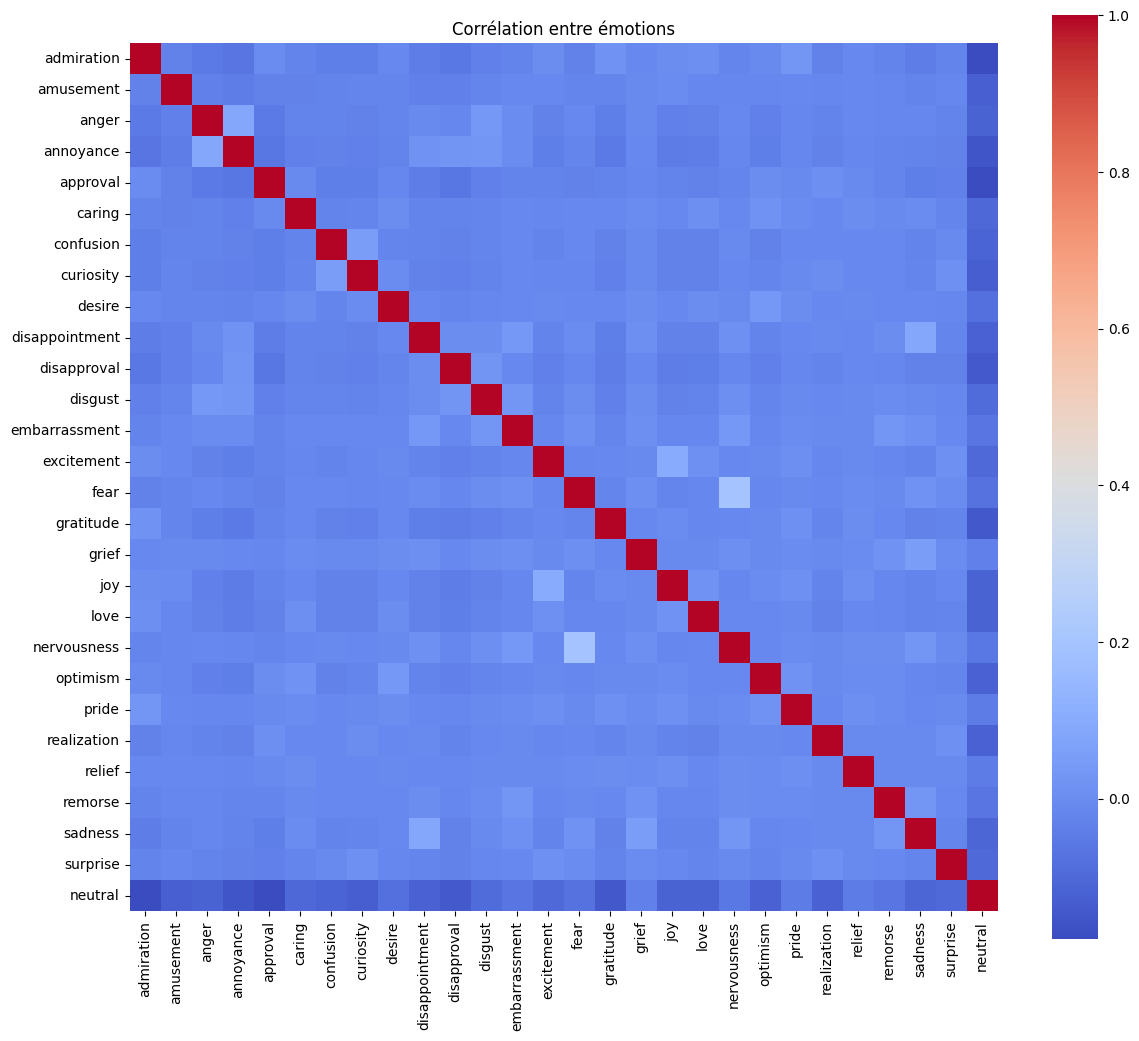

In [9]:
import seaborn as sns

# Matrice de corrélation entre émotions
correlation_matrix = df[label_cols].corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", square=True)
plt.title("Corrélation entre émotions")
plt.show()


### Analyse rare et fréquent

In [10]:
print("Exemples de textes avec 'neutral' :")
print(df[df['neutral'] == 1]['text'].sample(5).values)

print("\nExemples avec 'grief' :")
print(df[df['grief'] == 1]['text'].sample(5).values)


Exemples de textes avec 'neutral' :
['Must have been no phones around during slavery' 'You’re an asshole.'
 "Monster hunter world is making me desperately want to stay up all night and play it. But I can't make it past 11pm anymore 😫"
 'It’s like they’re in the middle of a pissing contest.'
 'Damn he has a kid with evan rachel wood too. He gets all the honies.']

Exemples avec 'grief' :
['Everyone who takes drugs will die.'
 'Of course they do, feminists are self-absorbed pigs that just want to control everything and never be held accountable for anything.'
 'Oh this poor sap'
 "I don't see any shoes on his feet after he lands. Kid is fucking dead."
 "I dread the day something happens in Ireland, we've been sheltered from the most of it."]


### longueur texte par émotion 

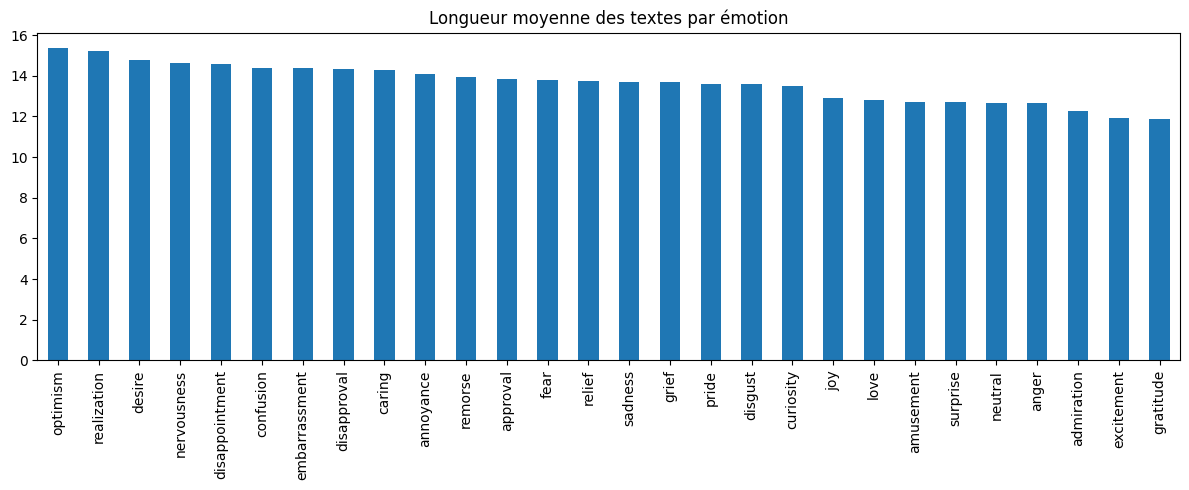

In [11]:
import numpy as np

emotion_lengths = {
    emotion: df[df[emotion] == 1]['text_length'].mean() 
    for emotion in label_cols
}

pd.Series(emotion_lengths).sort_values(ascending=False).plot(kind='bar', figsize=(12,5), title="Longueur moyenne des textes par émotion")
plt.tight_layout()
plt.show()


###  Analyse Exploratoire du Dataset GoEmotions

---

####  1. Structure générale du dataset

- **58 000+ exemples**
- Colonnes principales :
  - `id` (identifiant)
  - `text` (texte du commentaire)
  - `example_very_unclear` (booléen)
  - **30 colonnes binaires** représentant les émotions (`int64`, 0 ou 1)
    - 27 émotions
    - + `neutral`
    - + autres (`example_very_unclear`)

>  **Format multi-label**, chaque exemple peut avoir plusieurs émotions.

---

####  2. Distribution des émotions (fort déséquilibre)

- `neutral` domine largement (**55 298 exemples**)
- Classes fréquentes : `approval`, `admiration`, `gratitude`
- Classes très rares :
  - `grief` (~673)
  - `relief`, `pride`, `nervousness`... (< 2000 exemples)

#####  Implications :
- **Risque de surapprentissage** sur les classes fréquentes
- Besoin probable de :
  - techniques d’**oversampling/undersampling**
  - **pénalisation des classes majoritaires** (`class_weight`, `focal loss`)
  - ou **fusion de certaines classes** si pertinent

---

####  3. Nombre d’étiquettes par texte

- **Moyenne** : ~1.18 émotions/texte
- **170 000 exemples** avec **1 seule étiquette**
- Quelques cas extrêmes : jusqu’à **12 émotions** par texte

#####  Implications :
- Dataset **majoritairement mono-label**
- Tu peux entraîner :
  - Un **modèle mono-label simplifié**
  - Et un **modèle multi-label plus réaliste**

---

####  4. Corrélation entre émotions

- Heatmap = **peu de corrélations fortes globales**
- Quelques cooccurrences naturelles :
  - `admiration` ↔ `gratitude`
  - `disapproval` ↔ `anger`
  - `realization` ↔ `optimism`

#####  Implications :
- Ces associations peuvent être exploitées via :
  - **loss pondérée** (pondérer les erreurs entre émotions proches)
  - **modèle hiérarchique ou graphe de labels**

---

####  5. Longueur moyenne des textes par émotion

- **Longueur moyenne** : ~13 tokens
- Les textes les **plus longs** expriment :
  - `optimism`, `realization`, `desire`
- Les **plus courts** :
  - `gratitude`, `excitement`, `anger`, `neutral`

#####  Implications :
- Les émotions **cognitives ou complexes** nécessitent plus de contexte
- À envisager :
  - **Normalisation de longueur** (padding/troncature)
  - Étude de l'impact de la longueur sur la performance

---

####  Synthèse des forces et problèmes potentiels

| Élément                   | Observation                       | Conséquence                                      |
|---------------------------|-----------------------------------|--------------------------------------------------|
| Format multi-label        | ✅ OK                              | Doit être traité avec **sigmoid** (pas softmax) |
| Déséquilibre des classes  | ❗ Fort                            | Adapter la loss (focal, class weights...)        |
| Étiquettes par texte      | Souvent 1                         | Benchmark mono-label vs. multi-label             |
| Corrélations faibles      | Majoritairement indépendantes     | Potentiel pour graphe ou multi-task              |
| Longueurs des textes      | Variées selon l’émotion           | Adapter tokenizer et **max_length**              |

---


# Traitement des données

In [12]:
# Supprimer les exemples très flous
df_clean = df[(df['example_very_unclear'] == False) & (df['num_labels'] > 0)].copy()

print("Taille du dataset après nettoyage :", df_clean.shape)


Taille du dataset après nettoyage : (207814, 33)


###   Séparation des données

In [14]:
!pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 3.1 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/10.7 MB 3.1 MB/s eta 0:00:04
   -------- ------------------------------- 2.4/10.7 MB 3.9 MB/s eta 0:00:03
   ------------ --------------------------- 3.4/10.7 MB 4.3 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/10.7 MB 4.6 MB/s eta 0:00:02
   --------------------- ------------------ 5.8/10.7 MB 4.7 MB/s eta 0:00:02
   ------------------------ --------------- 6.6/10.7 MB 4.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.9/10.7 MB 4.8 MB/s eta 0:00:01
   --------------------------------- ------ 8.9/10.7 MB 4.9 MB/s eta 0:00:01
   ------------------------------------- -- 10.0/10.7 MB 4.9 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 4.7 MB/s eta 0:00:00
   

In [17]:
from sklearn.model_selection import train_test_split
df_stratifiable = df_clean[df_clean['num_labels'] <= 7].copy()

# Vérification
print(df_stratifiable['num_labels'].value_counts())

# Split maintenant OK avec stratify
df_train, df_temp = train_test_split(df_stratifiable, test_size=0.2, random_state=42, stratify=df_stratifiable['num_labels'])
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42, stratify=df_temp['num_labels'])

print("Train :", df_train.shape)
print("Val :", df_val.shape)
print("Test :", df_test.shape)



num_labels
1    171820
2     31187
3      4218
4       399
5       106
6        53
7        20
Name: count, dtype: int64
Train : (166242, 33)
Val : (20780, 33)
Test : (20781, 33)


### Préparer les features et labels

In [18]:
label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length']]

# X = textes, y = labels binaires
X_train = df_train['text'].tolist()
y_train = df_train[label_cols].values

X_val = df_val['text'].tolist()
y_val = df_val[label_cols].values

X_test = df_test['text'].tolist()
y_test = df_test[label_cols].values


####  Analyse des poids de classes

In [19]:
import numpy as np

# Fréquence inverse pour class weighting
class_weights = np.sum(y_train, axis=0)
class_weights = 1 / np.log1p(class_weights)  # ou 1/class_freq

# Affichage
for label, weight in zip(label_cols, class_weights):
    print(f"{label}: {weight:.3f}")


admiration: 0.105
amusement: 0.112
anger: 0.114
annoyance: 0.108
approval: 0.105
caring: 0.118
confusion: 0.115
curiosity: 0.112
desire: 0.125
disappointment: 0.113
disapproval: 0.110
disgust: 0.120
embarrassment: 0.132
excitement: 0.119
fear: 0.127
gratitude: 0.110
grief: 0.159
joy: 0.114
love: 0.114
nervousness: 0.138
optimism: 0.113
pride: 0.144
realization: 0.113
relief: 0.144
remorse: 0.132
sadness: 0.116
surprise: 0.119
neutral: 0.093


# Modélisation

## TF IDF + regression logistique

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Limite à 10k tokens max pour éviter surdimension
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2), stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print("Dimensions TF-IDF :", X_train_tfidf.shape)


Dimensions TF-IDF : (166242, 10000)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier


lr = LogisticRegression(solver='liblinear')
clf = OneVsRestClassifier(lr)

clf.fit(X_train_tfidf, y_train)


,estimator,LogisticRegre...r='liblinear')
,n_jobs,None
,verbose,0
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None


In [22]:
from sklearn.metrics import classification_report, f1_score, hamming_loss

y_val_pred = clf.predict(X_val_tfidf)

print("F1 micro :", f1_score(y_val, y_val_pred, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred))

# Rapport détaillé
print(classification_report(y_val, y_val_pred, target_names=label_cols))


F1 micro : 0.23770491803278687
F1 macro : 0.1698538763928398
Hamming loss : 0.03995943902103671
                precision    recall  f1-score   support

    admiration       0.67      0.27      0.38      1691
     amusement       0.61      0.27      0.37       926
         anger       0.59      0.11      0.18       861
     annoyance       0.37      0.02      0.04      1353
      approval       0.54      0.03      0.06      1794
        caring       0.50      0.03      0.06       577
     confusion       0.66      0.05      0.10       721
     curiosity       0.90      0.04      0.07       947
        desire       0.50      0.07      0.13       361
disappointment       0.61      0.02      0.05       849
   disapproval       0.40      0.01      0.02      1184
       disgust       0.63      0.08      0.14       550
 embarrassment       0.58      0.03      0.05       264
    excitement       0.70      0.06      0.12       553
          fear       0.65      0.16      0.26       318
     gr

c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Yann\Desktop\DEV\School\ml_m1\NLP\CustomGPT\scraper_env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


###  Analyse des Résultats - TF-IDF + Logistic Regression

---

#### Résultats globaux

| Indicateur       | Valeur    | Interprétation |
|------------------|-----------|----------------|
| **F1 micro**     | `0.2377`  | Mesure globale sur toutes les émotions, pondérée par fréquence. Correct mais peu discriminant. |
| **F1 macro**     | `0.1698`  | Moyenne simple des F1-score pour chaque émotion. Indique que les classes rares sont très mal prédites. |
| **Hamming Loss** | `0.0399`  | En moyenne, 3.99% des labels sont mal prédits par exemple. Plus c’est bas, mieux c’est. |

---

####  Performances par émotion

#####  Bonnes performances (précision + rappel équilibrés)

| Émotion      | F1-score | Remarques |
|--------------|----------|-----------|
| `gratitude`  | 0.80     | Très bon — émotion claire et bien représentée |
| `love`       | 0.50     | Moyenne correcte — souvent détectée correctement |
| `joy`        | 0.18     | Faible mais attendue pour une émotion plus diffuse |

---

#####  Faibles performances (émotions ignorées ou difficiles)

| Émotion         | F1-score | Remarques |
|-----------------|----------|-----------|
| `grief`         | 0.00     | Trop peu d’exemples pour apprendre correctement |
| `disapproval`   | 0.02     | Mauvais rappel malgré une fréquence modérée |
| `desire`        | 0.13     | Mal capturée, probablement trop abstraite pour TF-IDF |

---

####  Analyse qualitative

- Le modèle **sous-prédit beaucoup** → rappel très bas
- Les émotions les plus simples ou avec des **mots clés explicites** sont mieux détectées (`gratitude`, `excitement`, etc.)
- Les émotions **complexes ou peu fréquentes** sont souvent ignorées

> Le F1-macro très bas montre que le modèle ne généralise pas bien à toutes les classes.

---

####  Limites du modèle

- **TF-IDF** ne capture pas le sens ni le contexte grammatical
- **LogisticRegression (OneVsRest)** ne partage pas d'information entre classes
- Modèle **très sensible au déséquilibre** entre les classes

---

## Autres modèles classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

# Initialiser un modèle de forêt aléatoire
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Wrapping en OneVsRest pour le multi-label
clf_rf = OneVsRestClassifier(rf)

# Entraînement
clf_rf.fit(X_train_tfidf, y_train)

# Prédictions
y_val_pred_rf = clf_rf.predict(X_val_tfidf)


In [ ]:
from sklearn.metrics import f1_score, classification_report, hamming_loss

print("F1 micro :", f1_score(y_val, y_val_pred_rf, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_rf, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_rf))

print("\nRapport par classe :")
print(classification_report(y_val, y_val_pred_rf, target_names=label_cols))


###   Alternatives à TF-IDF pour la Vectorisation de Texte

---

####  🔹 1. Bag-of-Words (BoW)

📌 **Description**  
Simple comptage d’occurrences des mots  
Pas de pondération (contrairement au TF-IDF)


from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=10000, ngram_range=(1,2), stop_words='english')
X = vectorizer.fit_transform(X_train)

 Simple
 Ne tient pas compte de l’importance relative des mots

####   🔹 2. Word Embeddings Moyennés
📌 Description
Moyenne des vecteurs de mots pré-entraînés (ex: GloVe, FastText, Word2Vec)

import numpy as np
import gensim.downloader as api

#####   Charger un modèle GloVe ou FastText
glove = api.load("glove-wiki-gigaword-100")  # 100 dimensions

def vectorize_avg(text):
    words = text.lower().split()
    vectors = [glove[word] for word in words if word in glove]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_train_embed = np.array([vectorize_avg(t) for t in X_train])
✅ Vecteurs denses, conserve un peu de sens
❌ Perte de l’ordre, dépend du modèle choisi

####  3. Doc2Vec (gensim)
📌 Description
Crée un vecteur de document entier, entraîné sur le corpus
Basé sur Word2Vec + contexte global

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

tagged_docs = [TaggedDocument(words=text.lower().split(), tags=[i]) for i, text in enumerate(X_train)]
model = Doc2Vec(tagged_docs, vector_size=100, epochs=20)

X_train_vec = np.array([model.infer_vector(t.words) for t in tagged_docs])
✅ Encode mieux le contexte document
❌ Long à entraîner, dépend du volume

####  🔹 4. Sentence Embeddings (BERT-like)
📌 Description
Utilise des modèles de type Sentence-BERT ou USE pour obtenir un vecteur sémantique dense du texte entier

Exemple avec Sentence-BERT :

from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_sbert = model.encode(X_train, show_progress_bar=True)
✅ Très puissant pour la sémantique
✅ Fonctionne bien en downstream task (multi-label)
❌ Plus lent et demande des ressources

#### 🔹 5. Transformer Fine-Tuning (End-to-End)
📌 Description
Pas une "vectorisation" mais plutôt un fine-tuning complet
On entraîne le modèle comme un classifieur

from transformers import AutoTokenizer, AutoModelForSequenceClassification
#####  Exemple : "roberta-base" ou "distilbert-base-uncased"
 Meilleures performances globales
 Nécessite GPU pour entraînement efficace

#### 🧪 Comparatif résumé

| Méthode                  | Dense ? | Sémantique ? | Ordre ? | Performance |
|--------------------------|---------|--------------|---------|-------------|
| **BoW / TF-IDF**         | ❌       | ❌            | ❌       | Moyen        |
| **Embeddings Moyens**    | ✅       | 🟡            | ❌       | Moyen+       |
| **Doc2Vec**              | ✅       | ✅            | ✅       | Bon          |
| **Sentence-BERT / USE**  | ✅       | ✅✅           | ✅       | Très bon     |
| **Transformer Fine-Tune**| ✅       | ✅✅✅          | ✅       | Excellent    |


# Véctorization + Transformers léger

Objectif : capturer plus de sens, sans faire du finetuning

## Récupération du jeu de données

In [ ]:
label_cols = [col for col in df.columns if col not in ['id', 'text', 'example_very_unclear', 'num_labels', 'text_length']]

X_train = df_train['text'].tolist()
y_train = df_train[label_cols].values

X_val = df_val['text'].tolist()
y_val = df_val[label_cols].values

X_test = df_test['text'].tolist()
y_test = df_test[label_cols].values


### remarques

Sentence-BERT = BERT + pooling → encoder de manière sémantique le texte entier.
Il doit recevoir le texte brut, tel qu’il est écrit, pour fonctionner comme prévu.

si je fais du nettoyage comme je l'ai pour TF-IDF, je risque de dégrader ses performances.

In [27]:
!pip install transformers
!pip install sentence-transformers


   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.8 MB 5.9 MB/s eta 0:00:02
   -------- ------------------------------- 2.4/10.8 MB 5.9 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/10.8 MB 6.3 MB/s eta 0:00:02
   ------------------- -------------------- 5.2/10.8 MB 6.5 MB/s eta 0:00:01
   ------------------------ --------------- 6.6/10.8 MB 6.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.1/10.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/10.8 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------  10.7/10.8 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.5 MB 6.6 MB/s eta 0:00:01
   ------------------------------------- -- 2.4/2.5 MB 6.6 MB/s eta 0:00:01
   -----------

### Vectorizaition via transformers

In [ ]:
from sentence_transformers import SentenceTransformer

# Charger un modèle rapide et performant
sbert_model = SentenceTransformer('all-MiniLM-L6-v2')  # 384 dimensions

# Encoder les textes (⚠️ ça peut prendre quelques minutes)
X_train_sbert = sbert_model.encode(X_train, show_progress_bar=True, batch_size=32)
X_val_sbert = sbert_model.encode(X_val, show_progress_bar=True, batch_size=32)
X_test_sbert = sbert_model.encode(X_test, show_progress_bar=True, batch_size=32)


### entrainement modele

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

lr = LogisticRegression(max_iter=1000)
clf_sbert = OneVsRestClassifier(lr)

clf_sbert.fit(X_train_sbert, y_train)


### évaluation



In [ ]:
from sklearn.metrics import f1_score, classification_report, hamming_loss

y_val_pred_sbert = clf_sbert.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred_sbert, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_sbert, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_sbert))

print("\nRapport détaillé par classe :")
print(classification_report(y_val, y_val_pred_sbert, target_names=label_cols))


## modèles plus lourds sans fine tine : mpnet 

In [ ]:
from sentence_transformers import SentenceTransformer

# Modèle puissant (768 dimensions)
sbert_model = SentenceTransformer('all-mpnet-base-v2')

# Encodage (attention : plus lent que MiniLM)
X_train_sbert = sbert_model.encode(X_train, show_progress_bar=True, batch_size=32)
X_val_sbert = sbert_model.encode(X_val, show_progress_bar=True, batch_size=32)
X_test_sbert = sbert_model.encode(X_test, show_progress_bar=True, batch_size=32)


### avec logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
clf.fit(X_train_sbert, y_train)


In [ ]:
from sklearn.metrics import f1_score, hamming_loss, classification_report

y_val_pred = clf.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred))

print("\nClassification report:")
print(classification_report(y_val, y_val_pred, target_names=label_cols))


### avec mlp classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.multiclass import OneVsRestClassifier

# Définir un MLP simple
mlp = MLPClassifier(hidden_layer_sizes=(256, 128), 
                    activation='relu', 
                    max_iter=20, 
                    random_state=42, 
                    verbose=True)

clf_mlp = OneVsRestClassifier(mlp)

# Entraîner sur les embeddings SBERT
clf_mlp.fit(X_train_sbert, y_train)


In [ ]:
from sklearn.metrics import f1_score, hamming_loss, classification_report

y_val_pred_mlp = clf_mlp.predict(X_val_sbert)

print("F1 micro :", f1_score(y_val, y_val_pred_mlp, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_mlp, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_mlp))

print("\nClassification report:")
print(classification_report(y_val, y_val_pred_mlp, target_names=label_cols))


## light gbm avec mlp

In [26]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------------------- ------------------ 0.8/1.5 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.1 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb
from sklearn.multioutput import MultiOutputClassifier

lgbm = lgb.LGBMClassifier(objective='binary', n_estimators=100, random_state=42)
clf_lgbm = MultiOutputClassifier(lgbm)

clf_lgbm.fit(X_train_sbert, y_train)
y_val_pred_lgbm = clf_lgbm.predict(X_val_sbert)


In [ ]:
print("LightGBM")
print("F1 micro :", f1_score(y_val, y_val_pred_lgbm, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_lgbm, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_lgbm))


## USE + MLPClassifier

### Encodage avec Universal Sentence Encoder

In [25]:
!pip install tensorflow-hub

!pip install tensorflow-text

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 3.9 MB/s eta 0:00:01
   ------------------------------------ --- 1.6/1.7 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.3 MB/s eta 0:00:00

   ---------------------------------------- 0/3 [tf-keras]
   ---------------------------------------- 0/3 [tf-keras]
   ---------------------------------------- 0/3 [tf-keras]
   ---------------------------------------- 0/3 [tf-keras]
   ---------------------------------------- 0/3 [tf-keras]
   ---------------------------------------- 0/3 [tf-keras]
   ---------------------------------------- 0/3 [tf-keras]
   ---------------------------------------- 0/3 [tf-keras]
   ---------------------------------------- 0/3 [tf-keras]
   -----------------------

ERROR: Could not find a version that satisfies the requirement tensorflow-text (from versions: none)
ERROR: No matching distribution found for tensorflow-text


In [ ]:
import tensorflow_hub as hub

# Charger USE depuis TensorFlow Hub
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Encodage (⚠️ long sur CPU)
X_train_use = use_model(X_train).numpy()
X_val_use = use_model(X_val).numpy()
X_test_use = use_model(X_test).numpy()


### mlp classif avec use 

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=20, random_state=42, verbose=True)
clf_use_mlp = OneVsRestClassifier(mlp)

clf_use_mlp.fit(X_train_use, y_train)
y_val_pred_use = clf_use_mlp.predict(X_val_use)

NameError: name 'X_train_use' is not defined

### Evaluation

In [ ]:
print("USE + MLPClassifier")
print("F1 micro :", f1_score(y_val, y_val_pred_use, average='micro'))
print("F1 macro :", f1_score(y_val, y_val_pred_use, average='macro'))
print("Hamming loss :", hamming_loss(y_val, y_val_pred_use))


# Fine tuning Roberta 

fine tuning dun gros transformers pour les vecteurs les plus riches possible

In [ ]:
!pip install transformers datasets evaluate scikit-learn


In [ ]:
from datasets import Dataset, DatasetDict

train_ds = Dataset.from_pandas(df_train)
val_ds = Dataset.from_pandas(df_val)
test_ds = Dataset.from_pandas(df_test)

dataset = DatasetDict({
    'train': train_ds,
    'validation': val_ds,
    'test': test_ds
})


### Tokenisation

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset.map(tokenize_function, batched=True)


### Format pour entraînement

In [ ]:
# Supposons que tu as : label_cols = ["joy", "anger", ..., "neutral"]
def format_labels(example):
    return {"labels": [example[col] for col in label_cols]}

tokenized_dataset = tokenized_dataset.map(format_labels)


In [ ]:
# retirer colonne inutlie
tokenized_dataset = tokenized_dataset.remove_columns(["text", "__index_level_0__"])  
tokenized_dataset.set_format("torch")


### Modèle + entraînement

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "roberta-base",
    problem_type="multi_label_classification",
    num_labels=len(label_cols)
)


### Entraînement avec Trainer



In [ ]:
from transformers import TrainingArguments, Trainer
from sklearn.metrics import f1_score, hamming_loss
import numpy as np
import torch


def compute_metrics(eval_pred):
    logits, labels = eval_pred
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.tensor(logits))
    y_pred = (probs > 0.5).int().numpy()
    y_true = np.array(labels)

    return {
        "f1_micro": f1_score(y_true, y_pred, average="micro", zero_division=0),
        "f1_macro": f1_score(y_true, y_pred, average="macro", zero_division=0),
        "hamming_loss": hamming_loss(y_true, y_pred),
    }


training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="f1_micro"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


### evaluation finale

In [ ]:
trainer.evaluate(tokenized_dataset["test"])


In [ ]:
from sklearn.metrics import classification_report

# Get predictions
raw_preds = trainer.predict(tokenized_dataset["test"])
probs = torch.sigmoid(torch.tensor(raw_preds.predictions)).numpy()
preds = (probs > 0.5).astype(int)

print(classification_report(raw_preds.label_ids, preds, target_names=label_cols))
